# Customer outflow

Customers began to leave Beta Bank. Every month. A little, but noticeable. Bank marketers have found that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. Historical data on the behavior of customers and termination of contracts with the bank are presented. 

It is necessary to build a model with an extremely large value of *F1*-measures. To pass the project successfully, you need to bring the metric to 0.59. You need to check the *F1* measure on a test sample.

It is necessary to measure *AUC-ROC*, compare its value with *F1*-measure.

Source data: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Data preparation 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
#изучим количество значениq для всех столбцов
for i in df.columns:
    print(df[i].value_counts())

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: RowNumber, Length: 10000, dtype: int64
15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Greenwalt     1
Wieck         1
Wayn          1
Burfitt       1
Dowse         1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Lengt

#### Итоги анализа данных 
1. В столбце Tenure определен тип float, хотя все значения целые, также в этом столбце есть около тысячи пропусков, что не так существнно, т.к. они составляют примерно десяту часть. 

#### Предобработка данных

In [6]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean())

In [7]:
df['Tenure'] = df['Tenure'].astype('int')

In [8]:
df['Tenure'].value_counts()

4     1794
1      952
2      950
8      933
3      928
5      927
7      925
9      882
6      881
10     446
0      382
Name: Tenure, dtype: int64

In [9]:
df['Tenure'].count()

10000

#### Замена категраиальных призноков на колличественные

Т.к. в дальнейшем я буду рабоать с моделью, постоенной на регрессии, то лучше преобразовать признаки с помощью OHE, т.к. OE для неё не подходит

In [10]:
df['Geography'] = pd.get_dummies(df['Geography'], drop_first = True)


In [11]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first = True)

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,43,2,125510.82,1,1,1,79084.10,0


#### Разобъем датафрейм на данные для обучения, валидации и тестирования

In [13]:
df_train, df_others = train_test_split(df, test_size=0.40, random_state=12345)

In [14]:
df_valid, df_test = train_test_split(df_others, test_size=0.50, random_state=12345)

In [15]:
df_train.shape

(6000, 14)

In [16]:
df_valid.shape

(2000, 14)

In [17]:
df_test.shape

(2000, 14)

### Вывод 
В целом, изначально был получен почти что "чиcтый" дтафрейм, т.е. существенных проблем с хранением значений, кроме неверного типа днанных в одном столбце и наличия в нем 1000 пропусков, мною не было обнаружено. Пропуски я заполнил средним значением, тип данных в столбце Tenure я изменил на int. Датафрейм был разделен на обучающую, валидационную и тестовую выборки. Далее я преобразовал два категориальых признака в количественные (Geography, Gender)

# 2. Исследование задачи

Выделим данные с целевым признаком и всеми остальными

Фамилии клиентов (Surname), номер строки (RowNumber) и Айди (CustomerId) за исследуемые признаки брать не буду, врят ли они влияют на целевой признак

In [18]:
train_features = df_train.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
train_target = df_train['Exited'] 

In [19]:
valid_features = df_valid.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
valid_target = df_valid['Exited']

In [20]:
test_features = df_test.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)
test_target = df_test['Exited']

In [21]:
train_features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,567,0,1,35,8,153137.74,1,1,0,88659.07
3411,711,0,0,37,8,113899.92,1,0,0,80215.20
6027,850,1,1,44,3,140393.65,2,0,1,186285.52
1247,512,0,1,24,6,0.00,2,1,0,37654.31
3716,665,1,0,27,2,147435.96,1,0,0,187508.06


#### Масштабирование признаков

В качестве способа масштабирования взял стандартизацию. Насколько я понял, стандартизировать нужно только обучающую и валидационную выборки, поэтому тестовую оставлю в покое, т.к. при тестировании у модели уже сформируются условия вне зависимости от бОльших значений  определенных количественных признаков в нетронутой тестовой выборке(Balance, EstimatedSalary) и их разбросов. Мб я ошибаюсь :) 

Все исследуемые признаки колличественные, поэтому применю scaler ко всем признакам train_features и valid_features

In [22]:
scaler = StandardScaler()   
scaler.fit(train_features)

#train_features = scaler.transform(train_features)
#valid_features = scaler.transform(valid_features)
train_features_scaled = pd.DataFrame(scaler.transform(train_features), columns = train_features.columns, index = df_train.index)
valid_features_scaled = pd.DataFrame(scaler.transform(valid_features), columns = valid_features.columns, index = df_valid.index)

In [23]:
train_features_scaled.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,-0.886751,-0.572475,0.907278,-0.373192,1.109334,1.232271,-0.891560,0.642466,-1.055187,-0.187705
3411,0.608663,-0.572475,-1.102198,-0.183385,1.109334,0.600563,-0.891560,-1.556504,-1.055187,-0.333945
6027,2.052152,1.746802,0.907278,0.480939,-0.700051,1.027098,0.830152,-1.556504,0.947699,1.503095
1247,-1.457915,-0.572475,0.907278,-1.417129,0.385580,-1.233163,0.830152,0.642466,-1.055187,-1.071061
3716,0.130961,1.746802,-1.102198,-1.132419,-1.061928,1.140475,-0.891560,-1.556504,-1.055187,1.524268


### Вопрос 

Так и должно быть, что scaler.transform возвращет 'numpy.ndarray' object вместо DataFrame ?

Рассмотрим распределение классов целевого признака, чтобы понять, на сколько они сбалансированы

In [24]:
train_target.value_counts()

0    4804
1    1196
Name: Exited, dtype: int64

Очевидно, что есть дисбаланс. Класс 0 встречается чаще класса 1, т.е. у класса 0 вес будет больше. 

### Обучение моделей

Обучим модели без учета дисбаланса классов 

##### Логистическая регрессия 

In [25]:
regression_model = LogisticRegression(solver = 'liblinear', random_state=12345)
regression_model.fit(train_features_scaled, train_target)
prediction_reg =  regression_model.predict(valid_features_scaled)


In [26]:
f1_score(valid_target, prediction_reg)

0.33277310924369746

In [27]:
probabilities_valid = regression_model.predict_proba(valid_features_scaled)
probabilities_one_valid = probabilities_valid[:, 1] 
auc_roc = roc_auc_score(valid_target, probabilities_one_valid)

In [28]:
auc_roc

0.7594468875325884

Кчество модели желает лучшего, мб изменение баланса классов спасет ситуацию

##### Случайный лес

Сначала подберу оптимальное количество деревьев в случайном случайном лесу

In [29]:
f_models = []
for i in range(2, 70, 2):
    model_random_forest = RandomForestClassifier(n_estimators = i, random_state=12345)
    model_random_forest.fit(train_features_scaled, train_target)
    prediction_forest =  model_random_forest.predict(valid_features_scaled)
    f1 = f1_score(valid_target, prediction_forest)
    
    probabilities_valid = model_random_forest.predict_proba(valid_features_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(valid_target, probabilities_one_valid)
    f_models.append({
        'estimators' : i,
        'f1': f1,
        'auc-roc': auc_roc,
        'model': model_random_forest
    })
    #print("estimators: ", i ,'; ', 'f1 = ', f1)

In [30]:
df_f_models = pd.DataFrame(data = f_models)

In [31]:
df_f_models.head(5)

,estimators,f1,auc-roc,model
0,2,0.402027,0.740838,"(DecisionTreeClassifier(class_weight=None, cri..."
1,4,0.487654,0.790542,"(DecisionTreeClassifier(class_weight=None, cri..."
2,6,0.528073,0.805431,"(DecisionTreeClassifier(class_weight=None, cri..."
3,8,0.527439,0.809299,"(DecisionTreeClassifier(class_weight=None, cri..."
4,10,0.539877,0.813613,"(DecisionTreeClassifier(class_weight=None, cri..."


In [32]:
import matplotlib.pyplot as plt

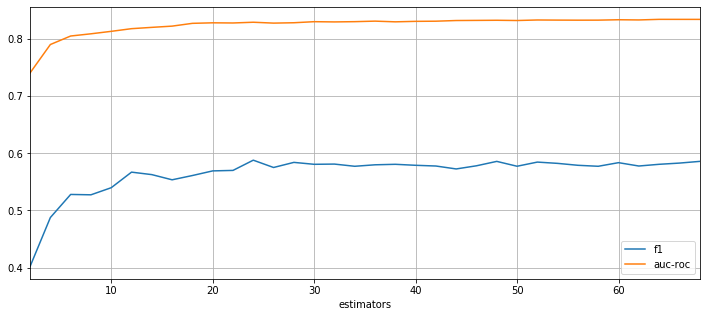

In [33]:
fig, ax = plt.subplots()
df_f_models.plot(ax = ax, x = 'estimators', y = 'f1',  grid = True, figsize = (12,5))
df_f_models.plot(ax = ax, x = 'estimators', y = 'auc-roc',  grid = True, figsize = (12,5))

In [34]:
max(f_models, key= lambda x: x['f1'])

{'estimators': 24,
 'f1': 0.5880597014925373,
 'auc-roc': 0.8295371372921443,
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=24,
                        n_jobs=None, oob_score=False, random_state=12345,
                        verbose=0, warm_start=False)}

Известно какое количество деревьев в лесу оптимальное. Теперь подберу глубину

In [35]:
f_models = []
for i in range(2, 60, 1):
    model_random_forest = RandomForestClassifier(n_estimators = 12, max_depth = i, random_state=12345)
    model_random_forest.fit(train_features_scaled, train_target)
    prediction_forest =  model_random_forest.predict(valid_features_scaled)
    f1 = f1_score(valid_target, prediction_forest)
    
    probabilities_valid = model_random_forest.predict_proba(valid_features_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(valid_target, probabilities_one_valid)
    f_models.append({
        'max_depth' : i,
        'estimators' : 12,
        'f1': f1,
        'auc-roc': auc_roc,
        'model': model_random_forest
    })
    #print("max_depth: ", i ,'; ', 'f1 = ', f1, 'auc-roc = ', auc_roc)

In [36]:
f_models_df = pd.DataFrame(data = f_models)

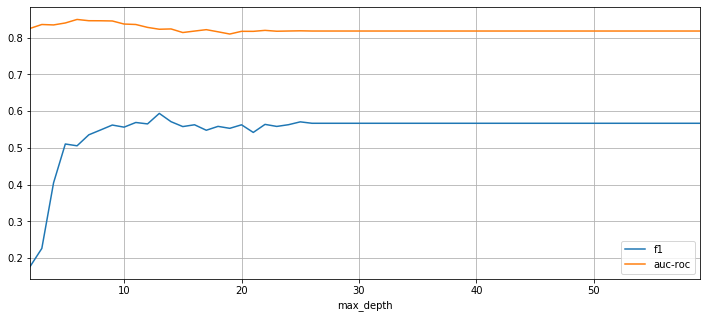

In [37]:
fig, ax = plt.subplots()
f_models_df.plot(ax = ax, x = 'max_depth', y = 'f1',  grid = True, figsize = (12,5))
f_models_df.plot(ax = ax, x = 'max_depth', y = 'auc-roc',  grid = True, figsize = (12,5))

In [38]:
max(f_models, key= lambda x: x['f1'])

{'max_depth': 13,
 'estimators': 12,
 'f1': 0.5940298507462686,
 'auc-roc': 0.8231139493948063,
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=13, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=12,
                        n_jobs=None, oob_score=False, random_state=12345,
                        verbose=0, warm_start=False)}

### Вывод 
На данном этапе я провел масштабирование исследемых признаков тренировочной и валидационной выборок с помощью стандартизаци. Далее узнал соотношение количества отрицательных и положительных объектов тренировочной выборки и сделал выыод, что классы для обучения модели несбалансированные. Затем были обучены модели с помощью логистической регрессии и случайного леса без учета дисбаланса классов. Качество модели регресии, измереное метрикой F1 составило 0.33, что не достаточно для установленных требований, зато ее auc-rok составил 0.76, что неплохо. Далее выбрал наиболее качественную модель случайного леса, сначала определив оптимальное количество деревьев в нем, а затем их глубину. Результыты метрик точности ниже.

В итоге получись модели с такими показателями точности :

    1. regression_model:
        F1 - 0.33  
        AUC-ROK - 0.76   
        
    2. model_random_forest 
        F1 - 0.59
        AUC-ROK - 0.82

# 3. Борьба с дисбалансом

Рассмотрим распределение классов целевого признака, чтобы понять, на сколько они сбалансированы

In [39]:
train_target.value_counts()

0    4804
1    1196
Name: Exited, dtype: int64

### Upsampling

Применю upsampling т.к. не считаю, что не стоит отбрасывать объекты отрицательного класса (0), потому что при upsamling будет больше объектов для обучения, а следовательно качественней модель. 

In [40]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [41]:
features_train_upsampled, target_train_upsampled = upsample(train_features_scaled, train_target, 4)

### ВОПРОС
Как быть, если значение аргумента repeat требуется нецелое ? Я пробовал указать 4.016, но вылетает ошибка. 

##### Логистическая регрессия

In [42]:
regression_model_upsampled = LogisticRegression(solver = 'liblinear', random_state=12345)
regression_model_upsampled.fit(features_train_upsampled, target_train_upsampled)
prediction_reg_upsampled =  regression_model_upsampled.predict(valid_features_scaled)


In [43]:
f1_score(valid_target, prediction_reg_upsampled)

0.4909871244635193

In [44]:
probabilities_valid = regression_model_upsampled.predict_proba(valid_features_scaled)
probabilities_one_valid = probabilities_valid[:, 1] 
auc_roc = roc_auc_score(valid_target, probabilities_one_valid)

In [45]:
auc_roc

0.7639986934351164

Upsampling заметно улучшил результаты F1. Проверю на всякий случай F1 посде downsampling. 

##### Случайный лес

In [46]:
f_models_3 = []
for i in range(2, 70, 2):
    model_random_forest = RandomForestClassifier(n_estimators = i, random_state=12345)
    model_random_forest.fit(features_train_upsampled, target_train_upsampled)
    prediction_forest =  model_random_forest.predict(valid_features_scaled)
    f1 = f1_score(valid_target, prediction_forest)
    
    probabilities_valid = model_random_forest.predict_proba(valid_features_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(valid_target, probabilities_one_valid)
    f_models_3.append({
        'estimators' : i,
        'f1': f1,
        'auc-roc': auc_roc,
        'model': model_random_forest
    })
    #print("estimators: ", i ,'; ', 'f1 = ', f1)

In [47]:
df_f_models_3 = pd.DataFrame(data = f_models_3)

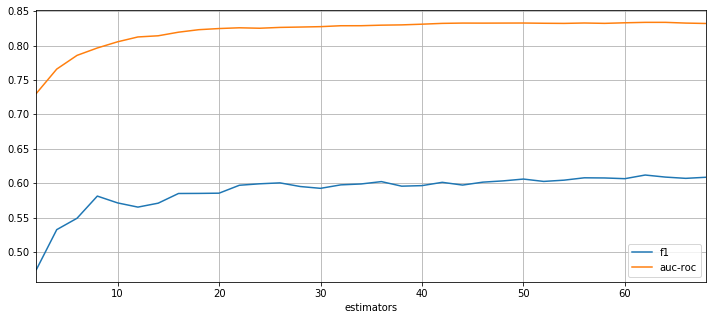

In [48]:
fig, ax = plt.subplots()
df_f_models_3.plot(ax = ax, x = 'estimators', y = 'f1',  grid = True, figsize = (12,5))
df_f_models_3.plot(ax = ax, x = 'estimators', y = 'auc-roc',  grid = True, figsize = (12,5))

In [49]:
max(f_models_3, key= lambda x: x['f1'])

{'estimators': 62,
 'f1': 0.6119205298013245,
 'auc-roc': 0.8336995445169643,
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=62,
                        n_jobs=None, oob_score=False, random_state=12345,
                        verbose=0, warm_start=False)}

Теперь подберу глубину

In [50]:
f_models_4 = []
for i in range(2, 60, 1):
    model_random_forest = RandomForestClassifier(n_estimators = 62, max_depth = i, random_state=12345)
    model_random_forest.fit(features_train_upsampled, target_train_upsampled)
    prediction_forest =  model_random_forest.predict(valid_features_scaled)
    f1 = f1_score(valid_target, prediction_forest)
    
    probabilities_valid = model_random_forest.predict_proba(valid_features_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(valid_target, probabilities_one_valid)
    f_models_4.append({
        'max_depth' : i,
        'estimators' : 12,
        'f1': f1,
        'auc-roc': auc_roc,
        'model': model_random_forest
    })
    #print("max_depth: ", i ,'; ', 'f1 = ', f1, 'auc-roc = ', auc_roc)

In [51]:
df_f_models_4 = pd.DataFrame(data = f_models_4)

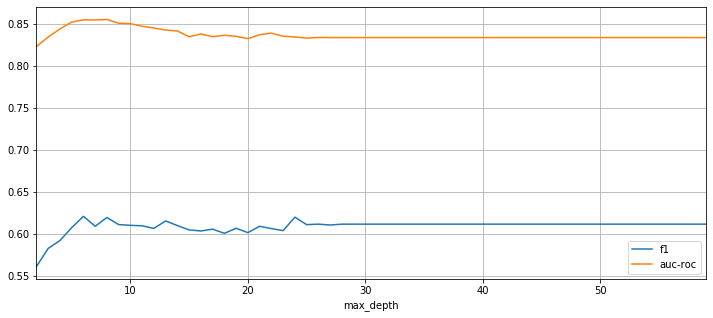

In [52]:
fig, ax = plt.subplots()
df_f_models_4.plot(ax = ax, x = 'max_depth', y = 'f1',  grid = True, figsize = (12,5))
df_f_models_4.plot(ax = ax, x = 'max_depth', y = 'auc-roc',  grid = True, figsize = (12,5))
plt.show()

In [53]:
max(f_models_4, key= lambda x: x['f1'])

{'max_depth': 6,
 'estimators': 12,
 'f1': 0.6212590299277605,
 'auc-roc': 0.854797391709362,
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=6, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=62,
                        n_jobs=None, oob_score=False, random_state=12345,
                        verbose=0, warm_start=False)}

1. Улучшенная регрессия (regression_model_upsampled):   
    F1 -   0.49  
    AUC-ROC - 0.76     
2. Улучшеный лес (model_random_forest) max_depth = 6, estimaters = 12   
    F1 - 0.62  
    AUC-ROC - 0.85   

### Downsampling

In [54]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [55]:
features_train_downsampled, target_train_downsampled = downsample(train_features_scaled, train_target, 0.25)

In [56]:
features_train_downsampled.shape

(2397, 10)

In [57]:
 target_train_downsampled.shape

(2397,)

In [58]:
 target_train_downsampled.value_counts()

0    1201
1    1196
Name: Exited, dtype: int64

##### Логистическая регрессия

In [59]:
regression_model_downsampled = LogisticRegression(solver = 'liblinear', random_state=12345)
regression_model_downsampled.fit(features_train_downsampled, target_train_downsampled)
prediction_reg_downsampled =  regression_model_downsampled.predict(valid_features_scaled)

In [60]:
f1_score(valid_target, prediction_reg_downsampled)

0.4901456726649529

In [61]:
probabilities_valid = regression_model_downsampled.predict_proba(valid_features_scaled)
probabilities_one_valid = probabilities_valid[:, 1] 
auc_roc = roc_auc_score(valid_target, probabilities_one_valid)

In [62]:
auc_roc

0.7631488213695946

##### Cлучайный лес

In [63]:
f_models_5 = []
for i in range(2, 70, 2):
    model_random_forest = RandomForestClassifier(n_estimators = i, random_state=12345)
    model_random_forest.fit(features_train_downsampled, target_train_downsampled)
    prediction_forest =  model_random_forest.predict(valid_features_scaled)
    f1 = f1_score(valid_target, prediction_forest)
    
    probabilities_valid = model_random_forest.predict_proba(valid_features_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(valid_target, probabilities_one_valid)
    f_models_5.append({
        'estimators' : i,
        'f1': f1,
        'auc-roc': auc_roc,
        'model': model_random_forest
    })
    #print("estimators: ", i ,'; ', 'f1 = ', f1)

In [64]:
df_f_models_5 = pd.DataFrame(data = f_models_5)

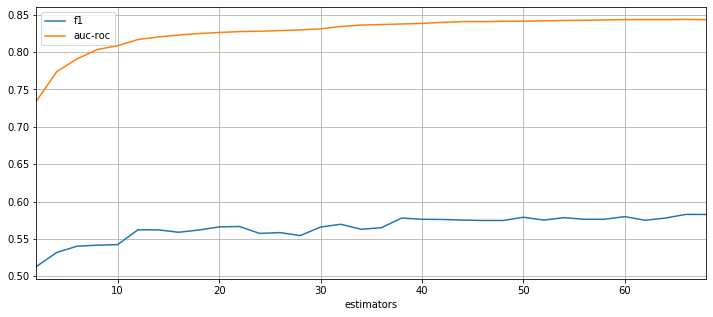

In [65]:
fig, ax = plt.subplots()
df_f_models_5.plot(ax = ax, x = 'estimators', y = 'f1',  grid = True, figsize = (12,5))
df_f_models_5.plot(ax = ax, x = 'estimators', y = 'auc-roc',  grid = True, figsize = (12,5))

In [66]:
max(f_models_5, key= lambda x: x['f1'])

{'estimators': 66,
 'f1': 0.5827814569536425,
 'auc-roc': 0.8437997144913773,
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=66,
                        n_jobs=None, oob_score=False, random_state=12345,
                        verbose=0, warm_start=False)}

Теперь подберу глубину

In [67]:
f_models_6 = []
for i in range(2, 10, 1):
    model_random_forest = RandomForestClassifier(n_estimators = 66, max_depth = i, random_state=12345)
    model_random_forest.fit(features_train_downsampled, target_train_downsampled)
    prediction_forest =  model_random_forest.predict(valid_features_scaled)
    f1 = f1_score(valid_target, prediction_forest)
    
    probabilities_valid = model_random_forest.predict_proba(valid_features_scaled)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc = roc_auc_score(valid_target, probabilities_one_valid)
    f_models_6.append({
        'max_depth' : i,
        'estimators' : 66,
        'f1': f1,
        'auc-roc': auc_roc,
        'model': model_random_forest
    })
    print("max_depth: ", i ,'; ', 'f1 = ', f1, 'auc-roc = ', auc_roc)

max_depth:  2 ;  f1 =  0.5744870651204281 auc-roc =  0.826819663801499
max_depth:  3 ;  f1 =  0.5683646112600537 auc-roc =  0.8344662440493833
max_depth:  4 ;  f1 =  0.5841035120147874 auc-roc =  0.8409907512143191
max_depth:  5 ;  f1 =  0.5896946564885497 auc-roc =  0.8450851081847822
max_depth:  6 ;  f1 =  0.5941893158388004 auc-roc =  0.8479356577283919
max_depth:  7 ;  f1 =  0.6023166023166022 auc-roc =  0.8506629607002218
max_depth:  8 ;  f1 =  0.6055396370582616 auc-roc =  0.8507899878416879
max_depth:  9 ;  f1 =  0.5893536121673003 auc-roc =  0.8484067167113277


In [68]:
df_f_models_6 = pd.DataFrame(data = f_models_6)

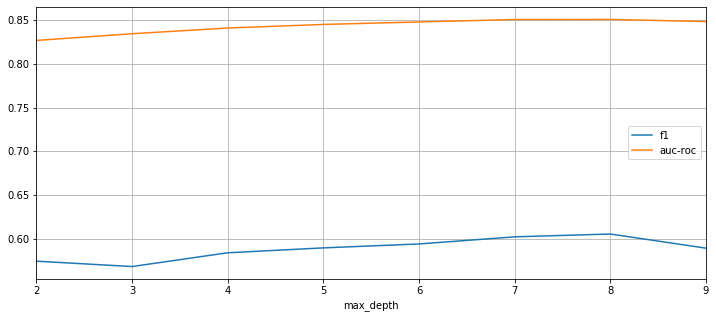

In [69]:
fig, ax = plt.subplots()
df_f_models_6.plot(ax = ax, x = 'max_depth', y = 'f1',  grid = True, figsize = (12,5))
df_f_models_6.plot(ax = ax, x = 'max_depth', y = 'auc-roc',  grid = True, figsize = (12,5))

In [70]:
max(f_models_6, key= lambda x: x['f1'])

{'max_depth': 8,
 'estimators': 66,
 'f1': 0.6055396370582616,
 'auc-roc': 0.8507899878416879,
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=8, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=66,
                        n_jobs=None, oob_score=False, random_state=12345,
                        verbose=0, warm_start=False)}

По сравнению с upsamling качество логистической регресии осталось прежним, зато F1 леса ухудшилась.

1. Улучшенная модель регрессии (regression_model_downsampled)   
    F1 - 0.49   
    AUC-ROC - 0.76  
2. Улучшенная модель леса (model_random_forest)   
    F1 - 0.60   
    AUC-ROC - 0.85    

### Изменение порога классификации

In [71]:
import numpy as np

##### Регрессия

In [72]:
regression_model_threshold = LogisticRegression(solver = 'liblinear', random_state=12345)
regression_model_threshold.fit(train_features_scaled, train_target)
#prediction_reg_threshold =  regression_model_threshold.predict(valid_features_scaled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [73]:
#Создам DataFrame для хранения результатов изменения порга, чтобы отоббразить их на графике

In [74]:
data_for_graph_of_threshold = []

In [75]:
probabilities_valid = regression_model_threshold.predict_proba(valid_features_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(valid_target, predicted_valid)
    
    #как я понял для расчета auc-roc нужны выероятности классов с учетом измененного порога
    
    
    data_for_graph_of_threshold.append({
        'threshold': threshold,
        'f1': f1
    })

    #print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(
        #threshold, precision, recall, f1))

In [76]:
df_for_graph_threshold = pd.DataFrame(data = data_for_graph_of_threshold)

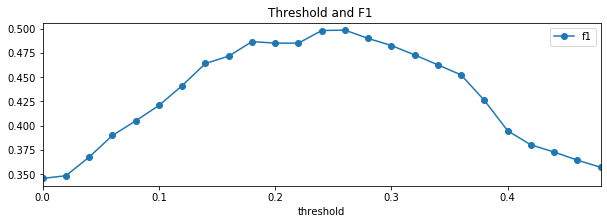

In [77]:

df_for_graph_threshold.plot(style = 'o-', title = 'Threshold and F1 ', x = 'threshold',
                            y = 'f1', figsize = (10,3))


Как видно из графика, наилучшее значение F1 расположено на пике между 0.2 и 0.3

In [78]:
max(data_for_graph_of_threshold, key= lambda x: x['f1'])

{'threshold': 0.26, 'f1': 0.4984802431610941}

Значение F1 = 0.49 не удовлетворяет требованиям

##### Лес

In [79]:
top_forest_upsampled_model = max(f_models, key= lambda x: x['f1'])['model']

In [80]:
data_for_graph_of_threshold_2 = []

In [81]:
top_forest_upsampled_model.fit(train_features_scaled, train_target)

probabilities_valid = top_forest_upsampled_model.predict_proba(valid_features_scaled)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(valid_target, predicted_valid)
    
    data_for_graph_of_threshold_2.append({
        'threshold': threshold,
        'f1': f1
    })

In [82]:
df_for_graph_threshold_2 = pd.DataFrame(data = data_for_graph_of_threshold_2)

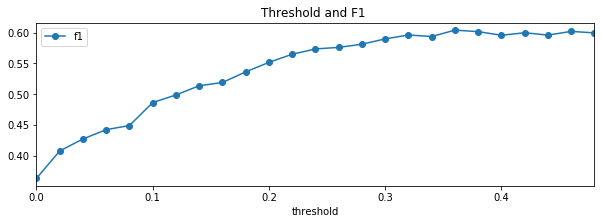

In [83]:
df_for_graph_threshold_2.plot(style = 'o-', title = 'Threshold and F1 ', x = 'threshold',
                            y = 'f1', figsize = (10,3))

In [84]:
max(data_for_graph_of_threshold_2, key= lambda x: x['f1'])

{'threshold': 0.36, 'f1': 0.6039603960396039}

Изменение порога на 0.36 вмесесто 0.50, как по умолчанию заметно увеличило F1 (0.60)

## Вопрос

Не разобрался, как находить вероятности классов, как аргумент для roc_auc_score. Проблема в том, что как я понял, нужно искать вероятности для объектов с учетом конкретного порога (т.е. тех, которые его прошли), но я не могу понять, как получить индексы
тех объектов из valid_features_scaled, которые прощли порог, чтобы по этим индексам получить данные с вероятностями. И вообще, нужно ли измерять AUC-ROC во время изменения порога ?

### Вывод

Среди способов борьбы с дисбалансом я использовал : Updampling, Downsampling и изменение порога оценки классов. 

Результаты после уравновешивания классов:
    
##### 1. Upsampling:   
    a. Улучшенная регрессия (regression_model_upsampled):      
        F1 -   0.49    
        AUC-ROC - 0.76        
    б. Улучшеный лес (model_random_forest) max_depth = 6, estimaters = 12   
        F1 - 0.62    
        AUC-ROC - 0.85      
              
##### 2. Downsampling:   
    a. Улучшенная модель регрессии (regression_model_downsampled)   
        F1 - 0.49      
        AUC-ROC - 0.76     
    б. Улучшенная модель леса (model_random_forest)   
        F1 - 0.60     
        AUC-ROC - 0.85   
            
##### 3. Изменение порога оценки классов:    
    a. Улучшенная модель регрессии
        F1 - 0,49
    б. Улучшенная модель леса:
        F1 - 0,60

##### На тест пойдут сбалансированная после даунсемплинга модель леса и модель леса с измененным порогом (0.36), т.к. эти модели показали наилучшие результаты

# 4. Тестирование модели

##### Тестирование модели с измененным порогом (0.36)

In [135]:
probabilities_test = regression_model_threshold.predict_proba(test_features)

In [136]:
probabilities_one_test = probabilities_valid[:, 1]

In [137]:
predicted_reg_threshold_test = probabilities_one_test > 0.36

In [138]:
f1 = f1_score(test_target, predicted_reg_threshold_test)

In [139]:
f1

0.20664206642066424

Плохой результат, возможно дело в стандартизации

##### тестирование модели после upsampling

In [140]:
best_forest_upsampled = max(f_models_4, key= lambda x: x['f1'])['model']

In [141]:
prediction_best_forest_upsampled =  best_forest_upsampled.predict(test_features)

In [142]:
f1 = f1_score(test_target, prediction_best_forest_upsampled)

In [143]:
f1

0.17289073305670816

##### Стандартизирую тестовую выборку

In [145]:
test_features_scaled = pd.DataFrame(scaler.transform(test_features), columns = test_features.columns, index = df_test.index)

Повыторяю тестирование:

In [146]:
probabilities_test = regression_model_threshold.predict_proba(test_features_scaled)
probabilities_one_test = probabilities_valid[:, 1]
predicted_reg_threshold_test = probabilities_one_test > 0.36
f1 = f1_score(test_target, predicted_reg_threshold_test)

In [147]:
f1

0.20664206642066424

In [150]:
best_forest_upsampled = max(f_models_4, key= lambda x: x['f1'])['model']
prediction_best_forest_upsampled =  best_forest_upsampled.predict(test_features_scaled)
f1 = f1_score(test_target, prediction_best_forest_upsampled)


In [151]:
f1

0.6056338028169014

In [152]:
probabilities_valid = best_forest_upsampled.predict_proba(test_features_scaled)
probabilities_one_valid = probabilities_valid[:, 1]
    
auc_roc = roc_auc_score(valid_target, probabilities_one_valid)

In [153]:
auc_roc

0.4996771393487741

### Вывод

Модель best_forest_upsampled достигла F1 в 0.60, и AUC-ROC в 0.49. На тестовой выборке вторая метрика значительна снизилась, возможно в связи с переобучением. Также я стандартизировал тестовую выборку, не уверен, что ее вообще нужно стандартизировать, 
ведь последующие данные для классификации готовой моделью надо будет каждый раз масштабировать, не уверен, что это правильный подход 